In [1]:
import numpy as np 
import pandas as pd

In [365]:
myjson = open('data.json','r')
data_list = []
for line in myjson:
    line = line.replace('\n','')
    data_list.append(line)
data_json_str = "[" + ','.join(data_list) + "]"
data_df = pd.read_json(data_json_str)

Drop the unneccessary data like _id, isGot, 二维码

In [366]:
data_df = data_df.drop(['_id', 'isGot', u'二维码'], axis=1)

In [367]:
data_df.head(1)

,,img_url,title,url,专场,估价,作品分类,作者,创作年代,尺寸,成交价,拍卖会,拍卖公司,拍卖时间,说明
0,NaN,http://img5.artron.net/auction/2017/art006471/...,0009 山水 扇面 纸本,http://auction.artron.net/paimai-art0064710009/,中国书画一,"RMB 1,000-1,000",中国书画>绘画,陈达,暂无,19×51cm,NaN,第二十六届中国书画专场拍卖会,安徽新艺占拍卖有限公司,2017-04-16,NaN


In [368]:
my_class_dict = {}
for i in data_df[u'作品分类']:
    if my_class_dict.has_key(i):
        my_class_dict[i] = my_class_dict[i] + 1
    else:
        my_class_dict[i] = 1

In [369]:
for i in my_class_dict:
    print i, my_class_dict[i]

nan 22
陶瓷>清代青花瓷器 1
古典家具>紫檀 7
西画雕塑>水粉水彩 1
竹木牙角>其它雕刻 5
陶瓷>清代其它彩釉瓷器 1
古籍善本>古籍善本其它 27
陶瓷>明代青花瓷器 1
其它类 4
竹木牙角>牙雕 6
邮品钱币>钱币 1
珠宝翡翠 5
陶瓷>清代粉彩瓷器 1
古典家具>红木 6
中国书画>绘画 60668
邮品钱币>邮品钱币其它 2
西画雕塑>油画 1
古典家具>铁力木 1
玉石器>摆件 9
古籍善本>碑帖印谱 18
古籍善本>书札文牍 9
鼻烟壶>内画类 2
工艺品杂项>漆器 3
陶瓷>现当代及其它瓷器 14
古典家具>古典家具其它 19
鼻烟壶>料器类 2
工艺品杂项>铜器 2
古典家具>黄花梨 2
工艺品杂项>笔墨纸砚 32
古典家具>花梨木 1
古籍善本>印刷文物 19
古籍善本>舆图照片 3
西画雕塑>版画 8
中国书画 80
古籍善本>历代刻本 60
陶瓷>民国瓷器 2
古籍善本>写本写经 18
竹木牙角>木雕 3
工艺品杂项>工艺品其它 40
古籍善本>近代书刊 162
玉石器>佩件 4
中国书画>书法 18306
邮品钱币>邮品 16
工艺品杂项>金银琉璃珐琅器 6


In [370]:
data_df.count()

           50166
img_url    79578
title      79578
url        79600
专场         79574
估价         79578
作品分类       79578
作者         79578
创作年代       79578
尺寸         79578
成交价        79383
拍卖会        79548
拍卖公司       79569
拍卖时间       79572
说明         29610
dtype: int64

## Objective
Get the final price of the it. Maybe we can use the expert system combined with the SAM method to give the final price estimation.

## Features
We have those following features: title, image（暂未获取）, 专场, 作品分类, 尺寸, 拍卖会, 拍卖公司, 拍卖时间, 说明, 作者名字&作者指数（暂未获取）. Totally, we have 10 features, 1 is image, 3 are numerical (尺寸，拍卖时间，作者指数), 6 are Chinese words (title, 专场, 拍卖会, 拍卖公司, 说明)
- **Image data:** cNN classification? In some cases, we have several work join together.  
- **Numerical data:** Decision Tree, kNN, or some regression method  
- **Words data:** **NLP? does not know!**  

**title:**
Four digits numbers with words to discribe it.

For some rows, we do not have title value. So we drop them.

In [371]:
len_list = []
num = 0
for i in data_df['title']:
    try:
        len_list.append(len(i.split()))
    except:
        print i

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [372]:
data_df = data_df.dropna(subset=['title'])

In [373]:
len_list = []
num = 0
for i in data_df['title']:
    try:
        len_list.append(len(i.split()))
    except:
        print i

In [374]:
data_df.head(10)['title']

0         0009 山水 扇面 纸本 
1         0576 脸谱 扇面 纸本 
2      9036 竹石图扇面 镜片 纸本 
3         0578 花鸟 扇面 纸本 
4         0573 山水 扇面 纸本 
5       0007 春江鱼肥 扇面 纸本 
6       0006 大吉大利 扇面 纸本 
7       0437 荷塘游鱼 扇面 纸本 
8       9037 花鸟扇面 镜片 纸本 
9    0067 扇面 书法 镜心 设色纸本 
Name: title, dtype: object

In [375]:
data_df.tail(10)['title']

79590    *1741 丙子（1696年）作 仿大痴山水 扇面 水墨纸本 
79591                   0050 扇面双挖 立轴 纸本 
79592            0891 当代 竹雕臂搁 紫檀扇面 （两把） 
79593      1567 辛卯（1531年）作 春柳烟波 扇面 设色金笺 
79594                *1455 秋卉鸣禽 扇面 设色金笺 
79595            0450 春山清霁 （六件） 扇面 水墨纸本 
79596      1571 丁卯（1567年）作 江岸读书 扇面 设色金笺 
79597                  0009 松林高士图 扇面 纸本 
79598            0446 1943年作 书法 扇面 水墨纸本 
79599                     0015 扇面 镜心 纸本 
Name: title, dtype: object

The title can be divided into several parts:
(content description) (type) (material)

In [376]:
len_list = []
max = 0
max_title = ''
for i in data_df['title']:
    try:
        l = len(i.split())
        if l > max:
            max_title = i
            max = l
        len_list.append(len(i.split()))
    except:
        print type(i)
print max_title
print max
print data_df[data_df['title']==max_title].iloc[0]['img_url']

3725 策杖访友图 春江放棹图 山林幽居图 林泉隐庐图 层峦巨嶂图 烟波渔叟图 夏云野舍图 溪山幽居图 白云红树图 清溪独隐图 听琴图 溪山深秀图 扇面 册页 （十二开） 设色金笺 
17
http://img4.artron.net/auction/2010/art7077/d/art70773725.jpg


In [377]:
len_list = []
max = 0
max_title = ''
for i in data_df['title']:
    try:
        l = len(i.split())
        if l > 10:
            print i
            print l
            print data_df[data_df['title']==i].iloc[0]['img_url']
        len_list.append(len(i.split()))
    except:
        print type(i)


1399 1936年作 1899年作 1880年作 1903年作 1942年作 书法 山水 （八幅） 扇面镜框 水墨 设色纸本 金笺 
13
http://img2.artron.net/auction/2014/art505109/d/art5051091399.jpg
0037 癸丑（1973年）作 / 己亥（1959年）作 / 戊戌（1958年）作 叠石苍松 云壑幽居 牡丹 （三幅） 扇面 水墨纸本 
12
http://img3.artron.net/auction/2009/art6111/d/art61110037.jpg
0416 乙亥（1995）年作 丙子（1996）年作 乙卯（1975）年作 己卯（1999）年作 书画合壁 （四幅） 立轴 扇面 洒金纸本 设色纸本 水墨纸本 纸本 
13
http://img4.artron.net/auction/2017/art510095/d/art5100950416.jpg
0715 1700年作、1724年作 楷书扇面 《东观奏记》 《酒谱》段落 七言诗四首 七言诗 （三幅） 镜框 水墨纸本 水墨洒金笺 水墨金笺 
12
http://img3.artron.net/auction/2013/art503298/d/art5032980715.jpg
0008 草书 隶书杜甫诗 草书四字书 草书二字句 隶书三字句 隶书四字句 楷书唐诗二幅 （七选一) 立轴 镜心 扇面 水墨纸本 
13
http://img3.artron.net/auction/2015/art506937/d/art5069370008.jpg
0057 书法 花卉 山水 人物 册页 扇面 （六开 二开） 水墨 设色纸本 
11
http://img3.artron.net/auction/2017/art510212/d/art5102120057.jpg
3725 策杖访友图 春江放棹图 山林幽居图 林泉隐庐图 层峦巨嶂图 烟波渔叟图 夏云野舍图 溪山幽居图 白云红树图 清溪独隐图 听琴图 溪山深秀图 扇面 册页 （十二开） 设色金笺 
17
http://img4.artron.net/auction/2010/art7077/d/art70773725.jpg
2230 书画 (二册) 册页 扇面 （十二开 十六开） 纸本 

In [38]:
%matplotlib inline

In [36]:
from matplotlib import pyplot as plt

(array([  0.00000000e+00,   0.00000000e+00,   8.13000000e+02,
          4.63400000e+03,   4.90670000e+04,   2.04010000e+04,
          3.54400000e+03,   8.18000000e+02,   2.06000000e+02,
          5.90000000e+01,   1.70000000e+01,   9.00000000e+00,
          3.00000000e+00,   5.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]),
 array([  0. ,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
          8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5]),
 <a list of 18 Patch objects>)

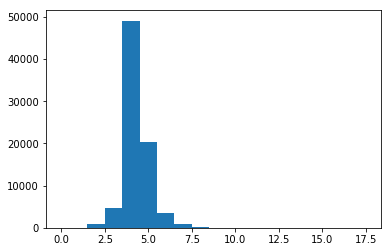

In [52]:
plt.hist(sorted(len_list, reverse=True), bins=np.r_[0,0.5:18:1])

In [53]:
len_list = np.array(len_list)

In [54]:
sum(len_list > 7)

301

We can drop those data with length greater than 301.

In [63]:
index_list = []
index = 0
for i in data_df['title']:
    try:
        l = len(i.split())
        if l > 7:
            index_list.append(index)
        index = index + 1
    except:
        print type(i)

In [64]:
data_df = data_df.drop(data_df.index[index_list])

In [65]:
data_df.count()

           49966
img_url    79277
title      79277
url        79277
专场         79273
估价         79277
作品分类       79277
作者         79277
创作年代       79277
尺寸         79277
成交价        79084
拍卖会        79247
拍卖公司       79268
拍卖时间       79271
说明         29445
dtype: int64

In [349]:
index_list = []
index = 0
for i in data_df['title']:
    try:
        l = len(i.split())
        if l > 6:
            index_list.append(index)
            print i
            print data_df[data_df['title'] == i].iloc[0]['img_url']
        index = index + 1
    except:
        print type(i)

0103 劲节干云 兰香石寿 书法 （套二） 扇面 纸本 
http://img3.artron.net/auction/2017/art510263/d/art5102630103.jpg
0076 书法扇面 山水扇面 镜片 镜框 水墨纸本 设色纸本 
http://img1.artron.net/auction/2015/art507483/d/art5074830076.jpg
0242 1940年作 书画双挖 （二幅） 扇面镜框 水墨 设色纸本 
http://img3.artron.net/auction/2011/art000308/d/art0003080242.jpg
0314 节临书谱 观瀑图 小楷 （三幅） 扇面 水墨纸本 
http://img2.artron.net/auction/2011/art7341/d/art73410314.jpg
0019 八哥杨柳 行书 扇面 （二开) 设色 水墨纸本 
http://img4.artron.net/auction/2016/art508524/d/art5085240019.jpg
0231 1932年作 人物 书法双挖 （二幅） 扇面 设色纸本 
http://img2.artron.net/auction/2011/art000308/d/art0003080231.jpg
0315 仕女 人物 竹荫山庄图 （三幅） 扇面 设色纸本 
http://img1.artron.net/auction/2011/art7341/d/art73410315.jpg
0232 戊午（1918年）作 受天百禄图 青门逸致 （共两幅） 扇面 设色纸本 
http://img5.artron.net/auction/2011/art7341/d/art73410232.jpg
0316 人物 节圣教序 临吴琚寿父帖 （三幅） 扇面 设色纸本 
http://img1.artron.net/auction/2011/art7341/d/art73410316.jpg
0313 水仙寿石 山水 小楷节黄庭经 （三幅） 扇面 设色纸本 
http://img1.artron.net/auction/2011/art7341/d/art73410313.jpg
0053 楷书 行书 扇面 （二开) 水墨冷金笺 纸

In [352]:
data_df.iloc[0]['img_url']

u'http://img5.artron.net/auction/2017/art006471/d/art0064710009.jpg'

In [347]:
data_df[data_df['title'] == u'0838 山水 花鸟扇组 （三把 两幅） 成扇、扇面 水墨、设色纸本 '].iloc[0]['img_url']

u'http://img1.artron.net/auction/2014/art505032/d/art5050320838.jpg'

We want to divide title into several parts: (content description) (type) (material)

Analysis the length of the title

In [217]:
len_title_list = []
for i in data_df['title']:
    len_title_list.append(len(i))

(array([  6.42110000e+04,   1.48380000e+04,   2.09000000e+02,
          1.30000000e+01,   4.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([   8.,   25.,   42.,   59.,   76.,   93.,  110.,  127.,  144.,
         161.,  178.]),
 <a list of 10 Patch objects>)

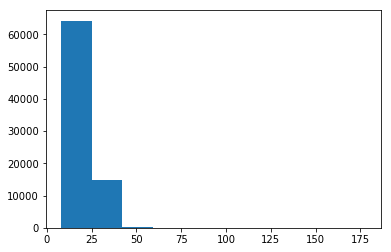

In [233]:
plt.hist(len_title_list, bins = 10)

In [220]:
len_hist_dict = {}
for i in len_title_list:
    if len_hist_dict.has_key(i):
        len_hist_dict[i] = len_hist_dict[i] + 1
    else:
        len_hist_dict[i] = 1

In [230]:
for i in sorted(len_hist_dict.iteritems(), key=lambda (k,v):k):
    print i

(8, 82)
(9, 19)
(10, 408)
(11, 1892)
(12, 457)
(13, 1282)
(14, 6407)
(15, 2715)
(16, 15258)
(17, 5890)
(18, 11298)
(19, 5234)
(20, 3485)
(21, 2562)
(22, 1884)
(23, 3062)
(24, 2276)
(25, 3479)
(26, 2103)
(27, 2118)
(28, 1698)
(29, 1855)
(30, 1120)
(31, 691)
(32, 536)
(33, 319)
(34, 245)
(35, 148)
(36, 152)
(37, 112)
(38, 76)
(39, 83)
(40, 60)
(41, 43)
(42, 47)
(43, 39)
(44, 23)
(45, 21)
(46, 23)
(47, 14)
(48, 8)
(49, 8)
(50, 4)
(51, 2)
(52, 4)
(53, 4)
(54, 2)
(55, 2)
(56, 4)
(57, 3)
(58, 1)
(59, 2)
(60, 1)
(61, 1)
(62, 1)
(65, 1)
(66, 3)
(69, 1)
(70, 1)
(72, 1)
(73, 1)
(77, 2)
(87, 1)
(90, 1)
(99, 1)
(178, 1)


In [244]:
for i in data_df['title']:
    if len(i) == 60:
        print i
        break

0856 庚辰（1940年）；戊寅（1938年）；癸未（1943年）；戊子（1948年）作 山水 （四帧） 扇面 纸本 


In [327]:
material_words_list = [u'金\s+', u'镜片', u'镜心', u'段\s+', u'纸本', u'锦\s+', u'纸\s+', u'水墨\s+', u'金笺', u'洒金', u'绢本', u'笺', u'泥金', u'绢', u'彩墨', u'金纸', u'绫本', u'金箋', u'设色']

In [328]:
material_list = []
unfound_list = []
for i in data_df['title']:
    flag = False
    for word in material_words_list:
        result = re.compile(u'\S*'+word).search(i)
        if result:
            material_list.append(result.group())
            flag = True
            break
    if flag == False:
        unfound_list.append(i)

In [329]:
len(material_list)

73243

In [330]:
len(unfound_list)

6034

In [325]:
for title in unfound_list[2400:2700]:
    print title

0502 豆荚蝈蝈 扇面 
0507 月雪梅图 扇面 
0510 花鸟 扇面 
0504 禽栖枝头 扇面 
0501 花鸟 扇面 
0505 秋趣 扇面 
0561 庚寅（1890年）作 墨竹 扇面镜心 
0576 戊寅（1818年）作 花鸟 扇面镜心 
0573 癸卯（1930年）作 花鸟 扇面镜心 
0564 花鸟 扇面镜心 
0556 无量寿佛 扇面镜心 
0565 花卉 扇面镜心 
0560 甲午（1894年）作 花卉 扇面镜心 
0568 癸未（1943年）作 书画合璧 扇面双挖镜心 
0563 芦塘渔渡 扇面镜心 
0566 松猴 扇面镜心 
0571 庚寅（1950年）作 菊蟹 扇面镜心 
0567 癸未（1943年）作 花卉草虫 扇面镜心 
0575 1824年作 荷花翠鸟 扇面镜心 
0562 丙午（1846年）作 山水 扇面镜心 
1478 大清一统廿三省舆地全图扇面 
0020 山水-扇面 镜片 
0037 山水-扇面 镜片 
0019 山水-扇面 （两挖） 立轴 
0044 鸟-扇面 镜片 
0017 人物-扇面 镜片 
0025 赏剑图-扇面 立轴 
0024 人物-扇面 镜片 
0045 花鸟-扇面 镜片 
0016 荷花-扇面 镜片 
0018 松鼠-扇面 镜片 
0021 达摩-扇面 镜片 
0036 引福归堂-赵少昂题-扇面 立轴 
0035 终南进士-扇面 立轴 
0022 泛舟访客-扇面 镜片 
0273 桃花冻芙蓉石扇面 
0083 山水扇面 镜心 
0781 仕女扇面 
0780 扇面双挖 
0785 螃蟹扇面 
0234 书画扇面 （二件） 
0442 山水扇面 （二件） 
0441 书画扇面 （二件） 
0783 蜻蜓扇面 
0788 书法扇面 
0789 书法扇面 
0790 扇面 
0024 行书 扇面 
0032 柳阴系骑 扇面 
0039 山林茅屋 扇面 
0025 行书 扇面 
0017 小憩图 团扇面 
0012 松声云影 扇面 
0037 雨过湖山 扇面 
0392 《山水 书法》 扇面 
0396 《山水》 扇面 
0395 《山水》 扇面 
0391 《墨梅》 扇面 
0066 1944年作 骏马 扇面三挖 
0963 摹古器文字 扇面 水墨书法 
0003 溪阁幽居 扇面 
0008 山水 扇面 
0

In [359]:
data_df[data_df['title']== u'3725 策杖访友图 春江放棹图 山林幽居图 林泉隐庐图 层峦巨嶂图 烟波渔叟图 夏云野舍图 溪山幽居图 白云红树图 清溪独隐图 听琴图 溪山深秀图 扇面 册页 （十二开） 设色金笺   ']

,,img_url,title,url,专场,估价,作品分类,作者,创作年代,尺寸,成交价,拍卖会,拍卖公司,拍卖时间,说明


In [168]:
material_dict = {}
for i in material_list:
    if material_dict.has_key(i):
        material_dict[i] = material_dict[i] + 1
    else:
        material_dict[i] = 1

In [169]:
print material_dict

{u'\u8bbe\u8272\u7eb8\u672c': 79277}


In [67]:
my_dict = {}
for i in data_df[u'专场']:
    if my_dict.has_key(i):
        my_dict[i] = my_dict[i] + 1
    else:
        my_dict[i] = 1

In [ ]:
for key, value in sorted(my_dict.iteritems(), key=lambda (k,v): (v,k), reverse=True):
    print "%s: %s" % (key, value)

For some rows, we do not have title value. For those data, the website does not response the right data, so we drop them.

In [ ]:
index_list = []
for i in range(len(data_df)):
    if type(data_df.iloc[i]['title']) == float:
        index_list.append(i)

In [ ]:
df_new = data_df.drop(data_df.index[index_list])

In [ ]:
for i in range(len(df_new)):
    if type(df_new.iloc[i]['title']) == float:
        print df_new.iloc[i]['title']

In [ ]:
df_new.iloc[40600]

In [ ]:
index_list[0]

In [ ]:
df_new_2.iloc[35]['img_url']